In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Install necessary libraries
!pip install seaborn

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Define the path to the dataset
train_dir = '/content/drive/MyDrive/Plant_disease_detection/train'
valid_dir = '/content/drive/MyDrive/Plant_disease_detection/valid'

In [ ]:
# Load training and validation datasets
training_set = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 7316 files belonging to 4 classes.


In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1829 files belonging to 4 classes.


In [ ]:
# Normalize pixel values to be between 0 and 1
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [ ]:
normalized_training_set = training_set.map(lambda x, y: (normalization_layer(x), y))
normalized_validation_set = validation_set.map(lambda x, y: (normalization_layer(x), y))

In [ ]:
# Print the number of classes
num_classes = len(training_set.class_names)
print("Number of classes:", num_classes)

Number of classes: 4


In [ ]:
# Define the CNN model with the correct number of output units
cnn = tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=1500, activation='relu'))

cnn.add(tf.keras.layers.Dropout(0.4))  # To avoid overfitting

# Output Layer with the correct number of units
cnn.add(tf.keras.layers.Dense(units=num_classes, activation='softmax'))

cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

In [ ]:
# Train the model
training_history = cnn.fit(x=normalized_training_set, validation_data=normalized_validation_set, epochs=10)

Epoch 1/10
229/229 [==============================] - 1495s 6s/step - loss: 0.6161 - accuracy: 0.7161 - val_loss: 0.2132 - val_accuracy: 0.9317
Epoch 2/10
229/229 [==============================] - 1230s 5s/step - loss: 0.1856 - accuracy: 0.9349 - val_loss: 0.2061 - val_accuracy: 0.9415
Epoch 3/10
229/229 [==============================] - 1220s 5s/step - loss: 0.1400 - accuracy: 0.9515 - val_loss: 0.1580 - val_accuracy: 0.9513
Epoch 4/10
229/229 [==============================] - 1208s 5s/step - loss: 0.1317 - accuracy: 0.9541 - val_loss: 0.1221 - val_accuracy: 0.9606
Epoch 5/10
229/229 [==============================] - 1218s 5s/step - loss: 0.1065 - accuracy: 0.9631 - val_loss: 0.1394 - val_accuracy: 0.9584
Epoch 6/10
229/229 [==============================] - 1218s 5s/step - loss: 0.1089 - accuracy: 0.9619 - val_loss: 0.1903 - val_accuracy: 0.9366
Epoch 7/10
229/229 [==============================] - 1202s 5s/step - loss: 0.1025 - accuracy: 0.9624 - val_loss: 0.1079 - val_accuracy:

In [ ]:
# Training set accuracy
train_loss, train_acc = cnn.evaluate(normalized_training_set)
print('Training accuracy:', train_acc)

229/229 [==============================] - 307s 1s/step - loss: 0.0543 - accuracy: 0.9807
Training accuracy: 0.9807271957397461


In [ ]:
# Validation set accuracy
val_loss, val_acc = cnn.evaluate(normalized_validation_set)
print('Validation accuracy:', val_acc)

In [ ]:
# Save the model
cnn.save('/content/drive/MyDrive/saved models/trained_plant_disease_model.keras')

In [ ]:
# Record training history in json
with open('/content/drive/MyDrive/saved models/training_hist.json', 'w') as f:
    json.dump(training_history.history, f)

In [ ]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


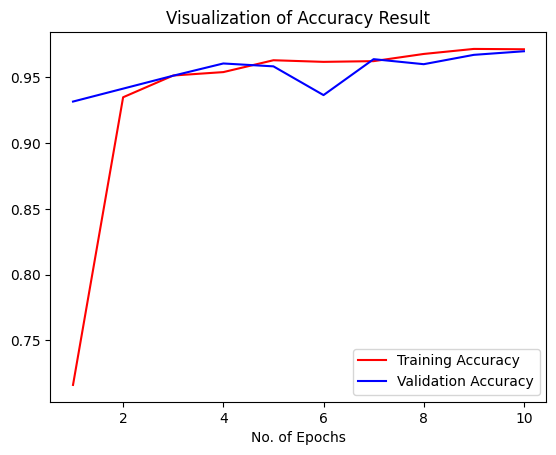

In [ ]:
# Plot training and validation accuracy
epochs = [i for i in range(1, 11)]
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [ ]:
# Get class names
class_names = validation_set.class_names

In [ ]:
# Load the test set
test_set = tf.keras.utils.image_dataset_from_directory(
    valid_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1829 files belonging to 4 classes.


In [ ]:
# Normalize the test set
normalized_test_set = test_set.map(lambda x, y: (normalization_layer(x), y))

In [ ]:
# Make predictions
y_pred = cnn.predict(normalized_test_set)
predicted_categories = tf.argmax(y_pred, axis=1)
true_categories = tf.concat([y for x, y in normalized_test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

1829/1829 [==============================] - 103s 56ms/step


In [ ]:
# Precision, Recall, F-score
print(classification_report(Y_true, predicted_categories, target_names=class_names))


                                                    precision    recall  f1-score   support

Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.92      0.94       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.97      0.95       477
                            Corn_(maize)___healthy       1.00      1.00      1.00       465

                                          accuracy                           0.97      1829
                                         macro avg       0.97      0.97      0.97      1829
                                      weighted avg       0.97      0.97      0.97      1829



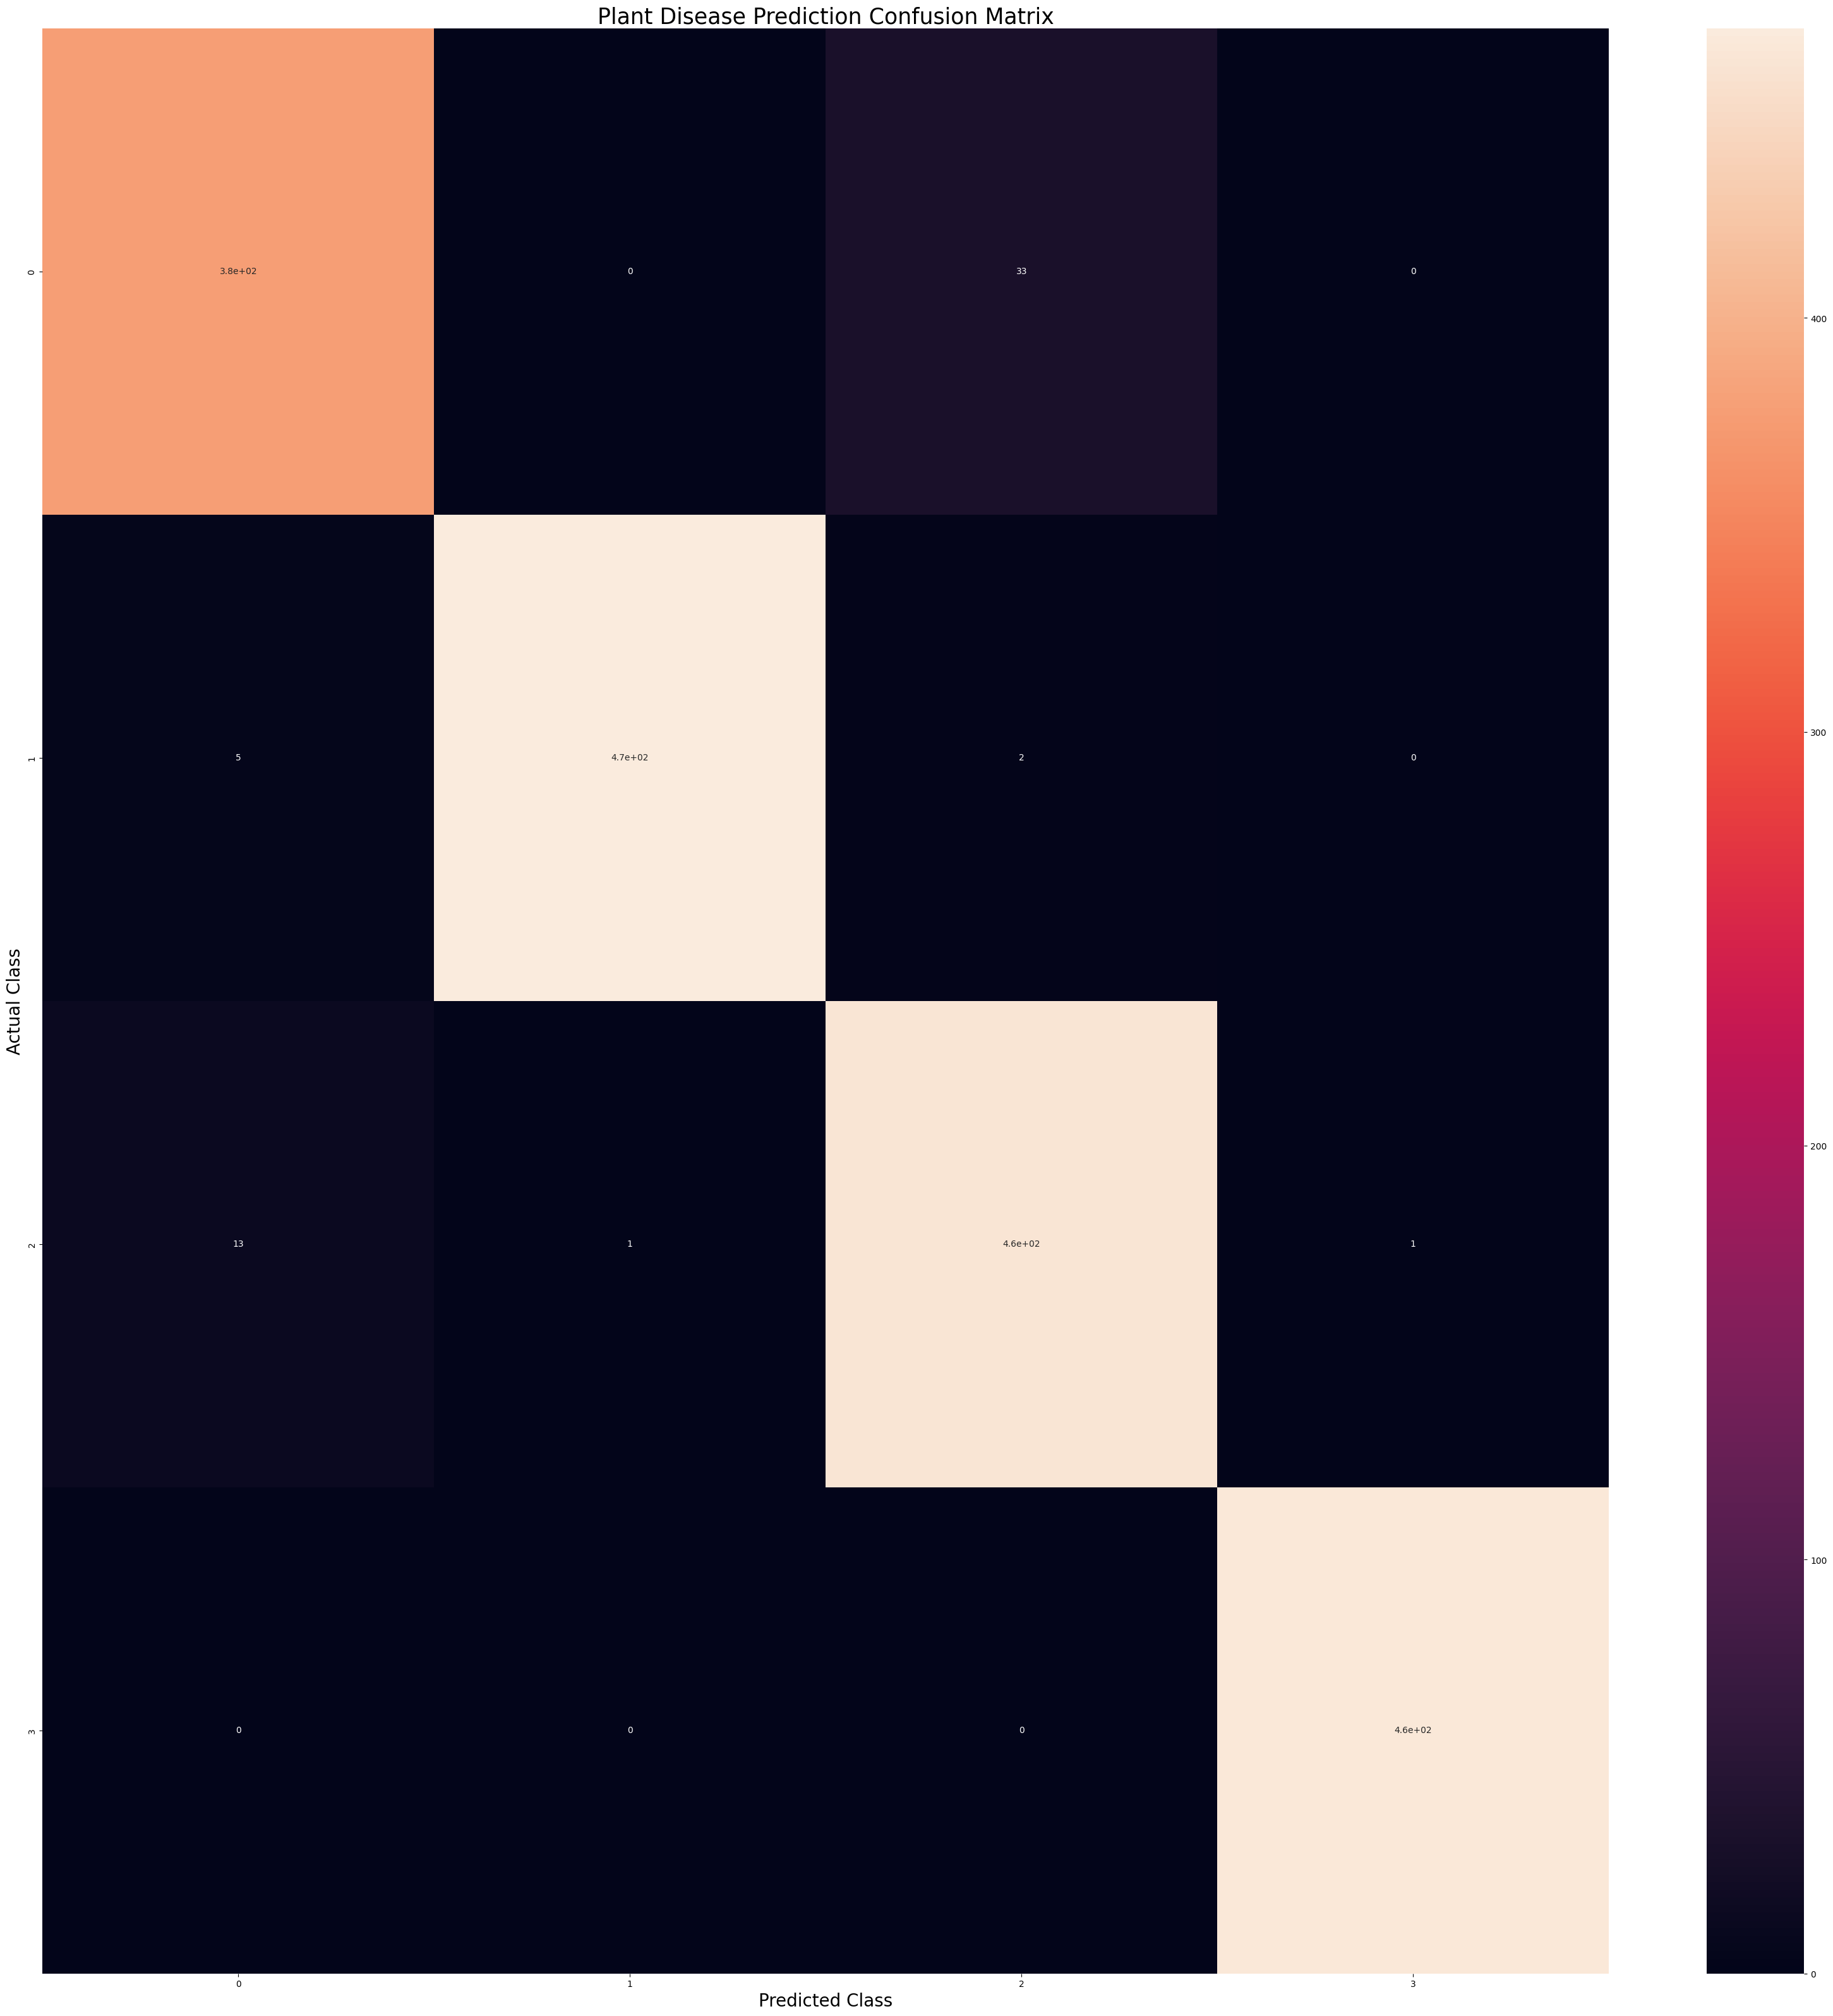

In [ ]:
# Confusion matrix
cm = confusion_matrix(Y_true, predicted_categories)

plt.figure(figsize=(40, 40))
sns.heatmap(cm, annot=True, annot_kws={"size": 10})

plt.xlabel('Predicted Class', fontsize=20)
plt.ylabel('Actual Class', fontsize=20)
plt.title('Plant Disease Prediction Confusion Matrix', fontsize=25)
plt.show()